#### [Data set here :](https://drive.google.com/drive/folders/169i4-aQMaFppPsta0BHY46YkfgRrc-Bd)

# Import necessary liberaries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Data Exploration

In [4]:
df = pd.read_csv("clean_data.csv")
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [6]:
df.isna().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

# Label encoding for categorical columns

In [7]:
label_encoder = LabelEncoder()

In [8]:
df['Income_type'] = label_encoder.fit_transform(df['Income_type'] )
df['Education_type'] = label_encoder.fit_transform(df['Education_type'] )
df['Family_status'] = label_encoder.fit_transform(df['Family_status'] )
df['Housing_type'] = label_encoder.fit_transform(df['Housing_type'] )
df['Occupation_type'] = label_encoder.fit_transform(df['Occupation_type'] )

In [9]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


# Split the data for train and test

In [10]:
X = df.drop(columns = "Target")
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Creat a decision tree classifier

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100 :.2f} %")

Accuracy: 74.82 %


In [15]:
y.value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

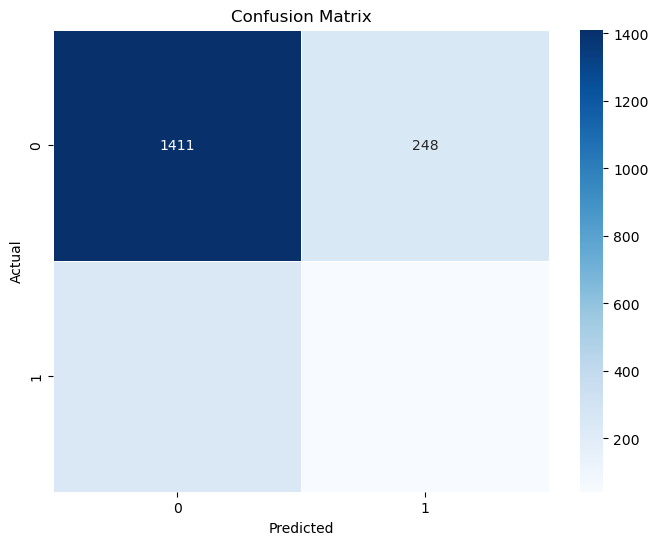

In [16]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()